In [6]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.coingecko.com/chart/1/twd.json?locale=zh-tw')
#res.json()

In [7]:
data_prices = res.json()['stats']

In [9]:
import pandas
df = pandas.DataFrame(data_prices)
#df

In [10]:
df.columns = ['datetime', 'twd']

In [11]:

df['datetime'] = pandas.to_datetime(df['datetime'], unit='ms')

In [12]:
df.head()

,datetime,twd
0,2013-04-29,4262.33
1,2013-04-30,4104.92
2,2013-05-01,3433.03
3,2013-05-02,3136.70
4,2013-05-03,2902.56


In [13]:
df.index = df['datetime']

Populating the interactive namespace from numpy and matplotlib


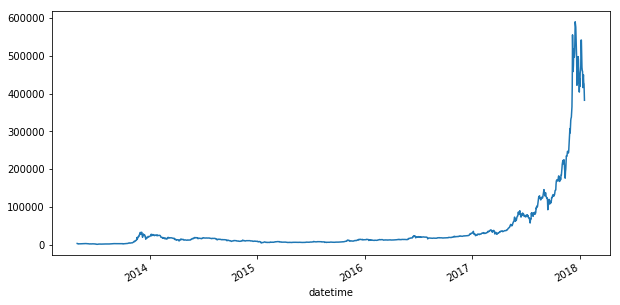

In [14]:
%pylab inline
df['twd'].plot(kind = 'line', figsize = [10,5])

In [15]:
df['ma7'] = df['twd'].rolling(window = 7).mean()

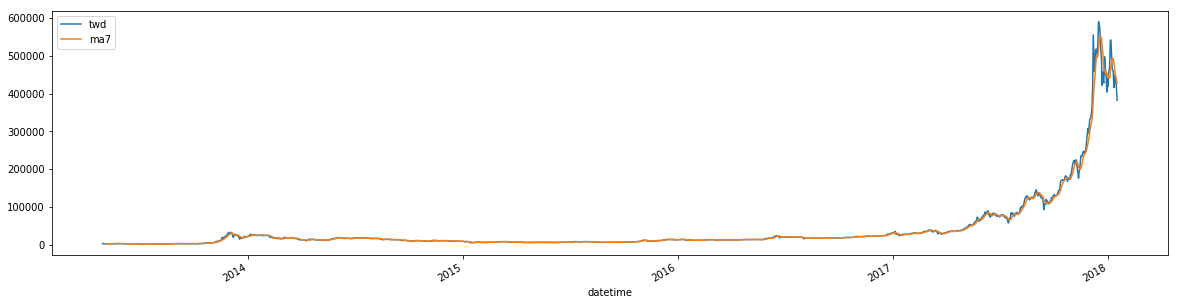

In [16]:
df[['twd', 'ma7']].plot(kind = 'line', figsize=[20,5])

In [17]:
df2 = df[df['datetime'] >= '2017-01-01']

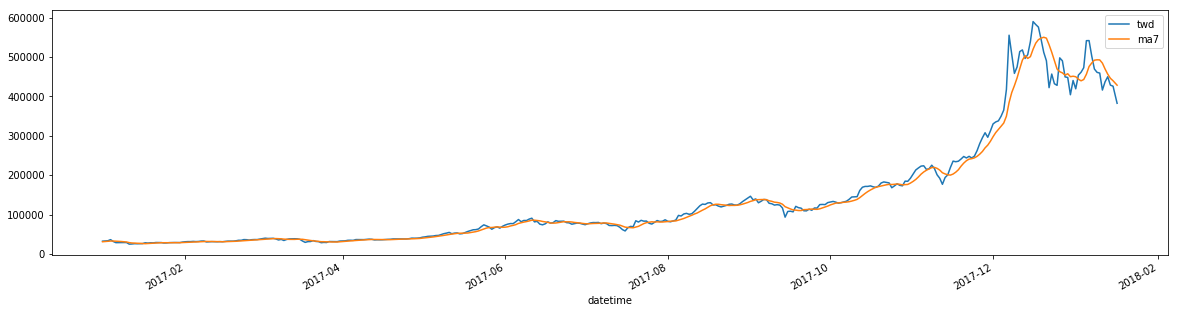

In [18]:
df2[['twd', 'ma7']].plot(kind = 'line', figsize=[20,5])